# Tredence Data Scientist Hiring Challenge

**Demand Forecasting :-**
_You are working as a data scientist in a CPG firm. The company holds warehouses in various cities across the country. Different items are sent to these warehouses on a weekly basis and from where they are distributed to various small stores on a daily basis._

_To increase the efficiency of this process, the management has decided to build software that can forecast weekly and daily demand in advance._

**Task :-** You are given a relevant dataset about the demand for products in the warehouses. You are required to build a machine learning model that can forecast weekly as well as daily demand. 

* **Notes:-** 
 * Your model will be evaluated on the basis of predicted weekly_dispatch_count, However, you are also required to analyze and forecast the daily_dispatch_count for the test data. 
 * You must create an ipython notebook containing your analysis and approach for the given task and upload it by clicking the Upload Source Code button. 

* _Dataset description The dataset folder contains the following files:_
   * train.csv. 16644 x 12 
   * test.csv: 4900 x 10 
   * submission_weekly.csv: 700 x 2 

**The columns provided in the dataset are as follows:**

|Column name |Description|
|:----------:|:-----------|
|ID |Represents the unique identification of each entry| 
|date |Represents the date in "yyyy-mm-dd" format| 
|warehouse_ID|Represents the unique identification of a warehouse|
|Latitude |Represents the latitude of the warehouse| 
|Longitude |Represents the longitude of the warehouse| 
|Product Type |Represents the type of a product ( Type_A or Type_B)|
|year |Represents the current year| 
|month |Represents the current month of the year| 
|is_weekend |Represents whether the day is weekend or not| 
|is_warehouse_closed |Represents whether the warehouse is closed or not|
|daily_dispatch_count |Represents the number of items of a specific product type that are dispatched (in thousands) from a specific warehouse on a specific day| 
|weekly_dispatch_count |Represents the number of items of a specific product type that are dispatched (in thousands) from a specific warehouse in the corresponding week, **Note:** The weekly_dispatch_count is calculated on Sundays.|

**Evaluation metric :-** 
_**The evaluation metric for this challenge will be mean_absolute_percentage_error.**_  
`score = max( 0 , 100*(1 metrics.mean_absolute_percentage_error (actual ,predicted)))`

## Data Import & Data Cleaning and Fill Missing Value

### Data Import

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import data from dataset folder...

In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

Check dataset information

In [3]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     16644 non-null  object 
 1   date                   16644 non-null  object 
 2   warehouse_ID           16644 non-null  object 
 3   Latitude               16312 non-null  float64
 4   Longitude              16228 non-null  float64
 5   Product_Type           16644 non-null  object 
 6   year                   16644 non-null  int64  
 7   month                  16644 non-null  object 
 8   is_weekend             16145 non-null  object 
 9   is_warehouse_closed    16478 non-null  object 
 10  daily_dispatch_count   16644 non-null  float64
 11  weekly_dispatch_count  2372 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 10 colu

(None, None)

Print out all data from test dataframe

In [4]:
df_train

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,0x6f53,2021-04-30,WH_0x3f0,37.915825,-89.829262,Type_B,2021,April,No,No,0.2,NaN
16640,0x74c8,2021-04-30,WH_0x3f1,48.692551,-116.319862,Type_A,2021,April,No,No,12.3,NaN
16641,0x74c9,2021-04-30,WH_0x3f1,48.692551,-116.319862,Type_B,2021,April,No,No,3.3,NaN
16642,0x794c,2021-04-30,WH_0x3f2,61.600803,-149.125259,Type_A,2021,April,No,No,7.1,NaN


> Now check one-by-one all columns data and find some patten...

### ID
Represents the unique identification of each entry

How many different `ID` are presents ?

In [5]:
len(df_train['ID'].unique())

16644

There are `ID` are unique for each individual entry. So, we can use as Index or either drop it, because is not impact on target columns.

### Date
Represents the date in "yyyy-mm-dd" format

first check date datatype

In [6]:
df_train['date'].dtype

dtype('O')

It's object so we have to change in datetime format

In [7]:
df_train['date'] = pd.DatetimeIndex(df_train['date'])

### Warehouse ID
Represents the unique identification of a warehouse

How many warehouse are presents ?

In [8]:
len(df_train['warehouse_ID'].unique())

10

In [9]:
df_train['warehouse_ID'].unique()

array(['WH_0x3e9', 'WH_0x3ea', 'WH_0x3eb', 'WH_0x3ec', 'WH_0x3ed',
       'WH_0x3ee', 'WH_0x3ef', 'WH_0x3f1', 'WH_0x3f0', 'WH_0x3f2'],
      dtype=object)

Now, how many null value are presents in warehouse column ?

In [10]:
df_train['warehouse_ID'].isna().sum()

0

### Latitude & Longitude
Represents the latitude and longitude of the warehouse

How many different Latitude present in dataframe ?

In [11]:
len(df_train['Latitude'].unique())

11

In [12]:
df_train['Latitude'].unique()

array([41.681471, 38.749077,       nan, 35.67897 , 34.361664, 25.750156,
       30.189375, 41.611603, 48.692551, 37.915825, 61.600803])

There is `nan` value is present in this column.

Create dictionary according to warehouse latitude data...

In [13]:
latitude_warehouse_ID = {}
for i in range(len(df_train)):
    if df_train['warehouse_ID'][i] not in latitude_warehouse_ID:
        latitude_warehouse_ID[df_train['warehouse_ID'][i]] = df_train['Latitude'][i]

In [14]:
latitude_warehouse_ID

{'WH_0x3e9': 41.681471,
 'WH_0x3ea': 38.749077,
 'WH_0x3eb': 35.67897,
 'WH_0x3ec': 34.361664000000005,
 'WH_0x3ed': 25.750156,
 'WH_0x3ee': 30.189375,
 'WH_0x3ef': 41.611603,
 'WH_0x3f1': 48.692551,
 'WH_0x3f0': 37.915825,
 'WH_0x3f2': 61.600803000000006}

How many different Longitude present in dataframe ?

In [15]:
len(df_train['Longitude'].unique())

11

In [16]:
df_train['Longitude'].unique()

array([ -72.794746, -105.18306 ,         nan, -109.067413,  -86.305595,
        -80.27964 ,  -82.648254,  -87.551186, -116.319862,  -89.829262,
       -149.125259])

There is `nan` value is present in this column.

Create dictionary according to warehouse longitude data...

In [17]:
longitude_warehouse_ID = {}
for i in range(len(df_train)):
    if df_train['warehouse_ID'][i] not in longitude_warehouse_ID or df_train['Longitude'][i] != np.nan:
        longitude_warehouse_ID[df_train['warehouse_ID'][i]] = df_train['Longitude'][i]

In [18]:
longitude_warehouse_ID

{'WH_0x3e9': -72.79474599999999,
 'WH_0x3ea': -105.18306,
 'WH_0x3eb': -109.067413,
 'WH_0x3ec': -86.305595,
 'WH_0x3ed': -80.27964,
 'WH_0x3ee': -82.64825400000001,
 'WH_0x3ef': -87.551186,
 'WH_0x3f1': -116.319862,
 'WH_0x3f0': -89.829262,
 'WH_0x3f2': -149.125259}

Now replace null value in Latitude and Longitude column according warehouse_ID...

In [19]:
for i in range(len(df_train)):
    if str(df_train['Latitude'][i]) == 'nan':
        df_train.loc[i,'Latitude'] = latitude_warehouse_ID[df_train['warehouse_ID'][i]]
    if str(df_train['Longitude'][i]) == 'nan':
        df_train.loc[i,'Longitude'] = longitude_warehouse_ID[df_train['warehouse_ID'][i]]

Now, make dataframe for get all location of warehouse are present by using folium library

In [20]:
m_df = pd.DataFrame(index=latitude_warehouse_ID.keys(), data=latitude_warehouse_ID.values(), columns=['Latitude'])
m_df['Longitude'] = longitude_warehouse_ID.values()
m_df.reset_index(inplace=True)
m_df

,index,Latitude,Longitude
0,WH_0x3e9,41.681471,-72.794746
1,WH_0x3ea,38.749077,-105.183060
2,WH_0x3eb,35.678970,-109.067413
3,WH_0x3ec,34.361664,-86.305595
4,WH_0x3ed,25.750156,-80.279640
5,WH_0x3ee,30.189375,-82.648254
6,WH_0x3ef,41.611603,-87.551186
7,WH_0x3f1,48.692551,-116.319862
8,WH_0x3f0,37.915825,-89.829262
9,WH_0x3f2,61.600803,-149.125259


In [21]:
latitude_warehouse_ID.keys()

dict_keys(['WH_0x3e9', 'WH_0x3ea', 'WH_0x3eb', 'WH_0x3ec', 'WH_0x3ed', 'WH_0x3ee', 'WH_0x3ef', 'WH_0x3f1', 'WH_0x3f0', 'WH_0x3f2'])

In [22]:
import folium

m = folium.Map(location=[m_df['Latitude'][0], m_df['Longitude'][0]])
for i in range(len(m_df)):
    folium.Marker(location=[m_df['Latitude'][i], m_df['Longitude'][i]],
                  tooltip=folium.map.Tooltip(text='<p><b>Warehouse ID:</b> {0}'.format(m_df['index'][i]))).add_to(m)
    

m

### Product Type
Represents the type of a product ( Type_A or Type_B)

In [23]:
df_train['Product_Type'].unique()

array(['Type_A', 'Type_B'], dtype=object)

How may product id is present in dataset...

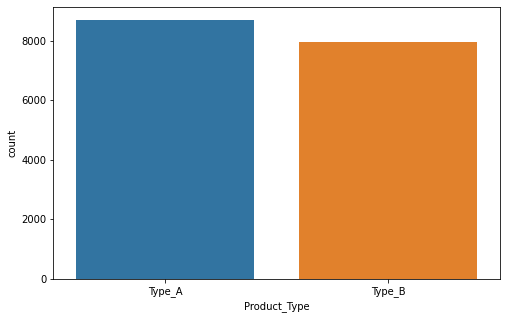

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['Product_Type'])
plt.savefig('How may product id.png')
plt.show()

Check product id count by each warehouse id and compare...

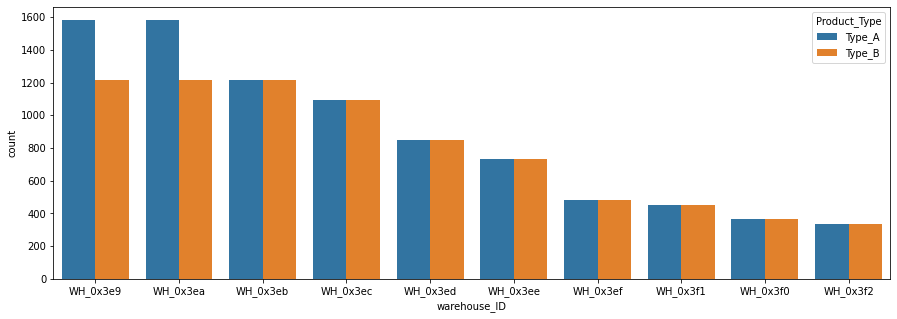

In [25]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df_train['warehouse_ID'], hue=df_train['Product_Type'])
plt.savefig('product id count by each warehouse id.png')
plt.show()

According, this plot warehouse id 'WH_0x3e9', 'WH_0x3ea' have Type A product more as compare to Type B, as well as other warehouse Id's has same amount of both products 

### Year	
Represents the current year

This column is compare to date column, for cross verification of the give year has same year as per given date...

In [26]:
df_train['date'].dt.year == df_train['year']

0        True
1        True
2        True
3        True
4        True
         ... 
16639    True
16640    True
16641    True
16642    True
16643    True
Length: 16644, dtype: bool

this all year data same as date year field...

### Month
Represents the current month

This column is compare to date column, for cross verification of the give month has same month as per given date...

In [27]:
df_train['date'].dt.month_name() == df_train['month']

0        True
1        True
2        True
3        True
4        True
         ... 
16639    True
16640    True
16641    True
16642    True
16643    True
Length: 16644, dtype: bool

this all year data same as date month field...

### Is Weekend	
Represents whether the day is weekend or not

In [28]:
# Check how many null value is presents in this column
df_train['is_weekend'].isna().sum()

499

In [29]:
df_train['is_weekend'].unique()

array(['Yes', 'No', nan], dtype=object)

Count how many No and Yes is present...

In [30]:
df_train['is_weekend'].value_counts()

No     11549
Yes     4596
Name: is_weekend, dtype: int64

Now show which day they choose for weekend...

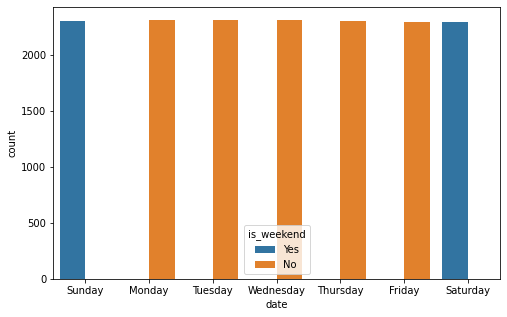

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['date'].dt.day_name(), hue=df_train['is_weekend'])
plt.savefig('which day they choose for weekend.png')
plt.show()

As per this graph clearly shows that Sunday and Saturday are weekend and rest of day is not weekend...

In [32]:
df_train['date'].dt.day_name().unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

According to above analysis we fill null value by crate dictionary...

In [33]:
# create dict data fill in day_name is weekend
is_weekend_dict = {'Sunday': 'Yes', 'Monday': 'No', 'Tuesday':'No', 'Wednesday':'No', 'Thursday':'No', 'Friday':'No',
                   'Saturday':'No'}

for i in range(len(df_train)):
    if str(df_train['is_weekend'][i]) == 'nan':
        df_train.loc[i,'is_weekend'] = is_weekend_dict[df_train['date'].dt.day_name()[i]]

### Is warehouse closed	
Represents whether the warehouse is closed or not

In [34]:
# Check how many null value is presents in this column
df_train['is_warehouse_closed'].isna().sum()

166

In [35]:
df_train['is_warehouse_closed'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [36]:
df_train['is_warehouse_closed'].value_counts()

No     15365
Yes     1113
Name: is_warehouse_closed, dtype: int64

Now, find the pattern between this column for fill null value, by checking each of column...

* First, check with week days warehouse is closed ...

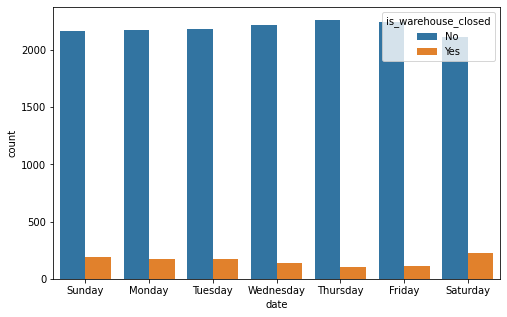

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df_train['date'].dt.day_name(), hue=df_train['is_warehouse_closed'])
plt.savefig('week days warehouse is closed.png')
plt.show()

According to, this graph is not shows clearly a good pattern

* Second, check is that related with date...?

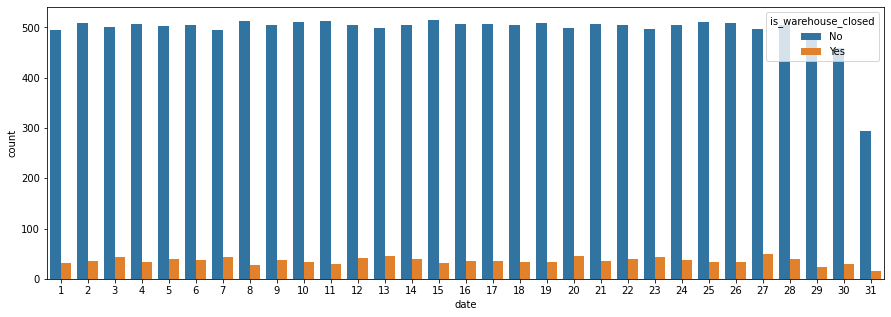

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df_train['date'].dt.day, hue=df_train['is_warehouse_closed'])
plt.savefig('week days warehouse is closed is related with date.png')
plt.show()

According to, this graph is not related to date...

* Now, check is this related with month...?

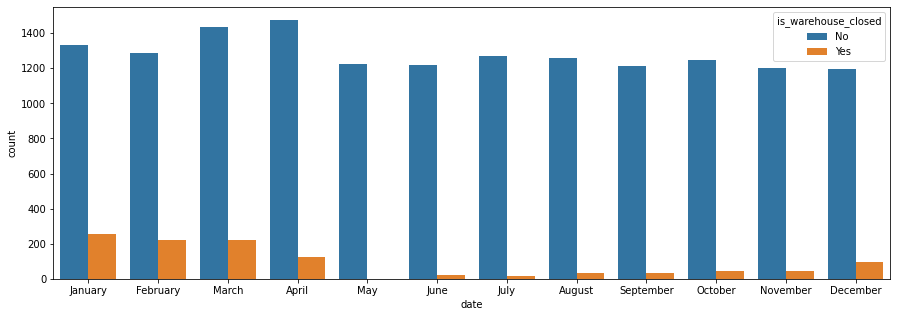

In [39]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df_train['date'].dt.month_name(), hue=df_train['is_warehouse_closed'])
plt.savefig('week days warehouse is closedis this related with month.png')
plt.show()

According to, this plot is some kind of pattern is show-up like May to December is gradually increased, while January to April gradually declined, lastly in the May month warehouse is normally opened, never be closed, while, in a month of a January has maximum day id closed.

* Now, check is that related with warehouse Id or their location....

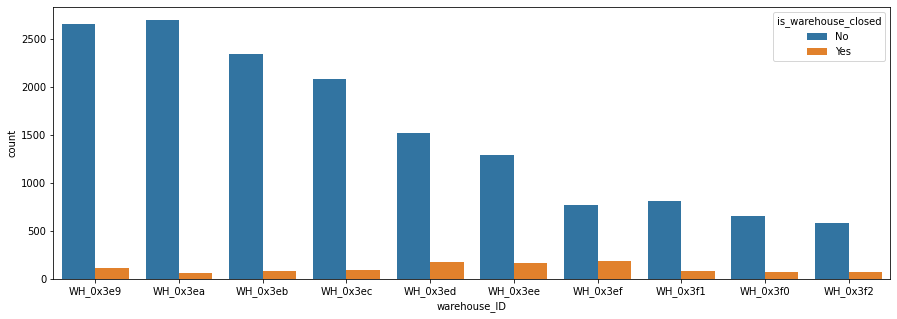

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df_train['warehouse_ID'], hue=df_train['is_warehouse_closed'])
plt.savefig('week days warehouse is closed is that related with warehouse Id.png')
plt.show()

Their is not such a pattern behind the this plot...

* Now, check is this related with our target column, because in the train dataset we have `daily_dispatch_count` has not null value.

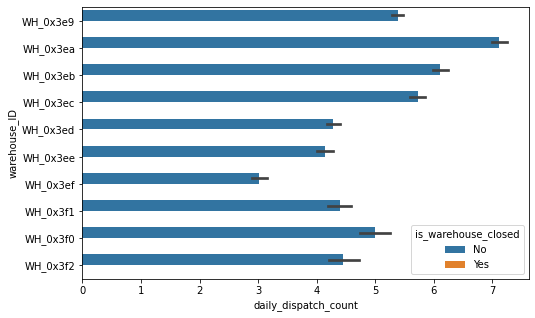

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x = df_train['daily_dispatch_count'], y=df_train['warehouse_ID'], hue = df_train['is_warehouse_closed'])
plt.savefig('week days warehouse is closed is this related with daily_dispatch_count.png')
plt.show()

Now, this picture is clear whenever column `daily_dispatch_count` value is `0` that means warehouse is closed.

So, we fill null value in train dataset by using column daily_dispatch_count

In [42]:
for i in range(len(df_train)):
    if str(df_train['is_warehouse_closed'][i]) == 'nan':
        if df_train['daily_dispatch_count'][i] == 0:
            df_train.loc[i, 'is_warehouse_closed'] = 'Yes'
        else:
            df_train.loc[i, 'is_warehouse_closed'] = 'No'

### daily_dispatch_count	
Represents the number of items of a specific product type that are dispatched (in thousands) from a specific warehouse on a specific day

In [43]:
df_train['daily_dispatch_count'].isna().sum()

0

Now, plot line graph for this columns according to date...

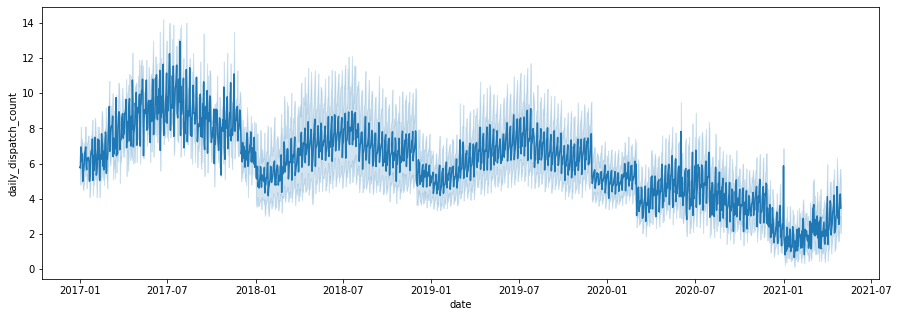

In [44]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_train['date'], y=df_train['daily_dispatch_count'])
plt.savefig('daily_dispatch_count according to date.png')
plt.show()

It is difficult for understanding...

So, plot new graph for only one warehouse...

In [45]:
df_train['warehouse_ID'].unique()

array(['WH_0x3e9', 'WH_0x3ea', 'WH_0x3eb', 'WH_0x3ec', 'WH_0x3ed',
       'WH_0x3ee', 'WH_0x3ef', 'WH_0x3f1', 'WH_0x3f0', 'WH_0x3f2'],
      dtype=object)

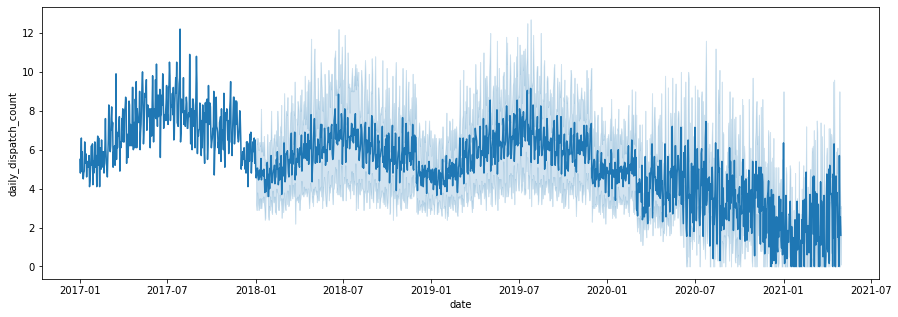

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_train[df_train['warehouse_ID'] == 'WH_0x3e9'], x='date', y='daily_dispatch_count')
plt.savefig('daily_dispatch_count according to date only one warehouse.png')
plt.show()

It was also not helping...

### weekly_dispatch_count
Represents the number of items of a specific product type that are dispatched (in thousands) from a specific warehouse in the corresponding week, Note: The weekly_dispatch_count is calculated on Sundays.


In [47]:
df_train['weekly_dispatch_count'].isna().sum()

14272

## Data Preparation

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     16644 non-null  object        
 1   date                   16644 non-null  datetime64[ns]
 2   warehouse_ID           16644 non-null  object        
 3   Latitude               16644 non-null  float64       
 4   Longitude              16644 non-null  float64       
 5   Product_Type           16644 non-null  object        
 6   year                   16644 non-null  int64         
 7   month                  16644 non-null  object        
 8   is_weekend             16644 non-null  object        
 9   is_warehouse_closed    16644 non-null  object        
 10  daily_dispatch_count   16644 non-null  float64       
 11  weekly_dispatch_count  2372 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory

Now, convert all category data and object data into numeric format. Because of while run model of find pattern between features and target columns that time string data not valid. So, first do this by using `LabelEncoder`.

In [49]:
def convert_all_data_in_numeric(dataset):
    # load LoabelEncoder
    from sklearn.preprocessing import LabelEncoder
    #Create necessary dict..
    labeled_data = {}
    col_num = {}
    new_data = {}

    for colNo, column in enumerate(dataset.columns):
        # Check is there Object data type..
        if dataset[column].dtype == 'O':
            col_num[column] = colNo
            labeled_data[column] = LabelEncoder().fit(dataset[column])
        # Check is there Date time format
        elif str(dataset[column].dtype) == 'datetime64[ns]':
            # Conver date in to day, week, weekday, quarter, year, month
            # In this dataframe we have already year and month column so I skip this...
            new_data['day'] = list(dataset['date'].dt.day)
            new_data['week'] = list(dataset['date'].dt.isocalendar().week)
            new_data['weekday'] = list(dataset['date'].dt.weekday)
            new_data['quarter'] = list(dataset['date'].dt.quarter)
        else:
            # rest of column as it is...
            new_data[column] = list(dataset[column])
    # Now, all numeric columns make new dataframe
    new_data = pd.DataFrame(new_data)    
    # and all categories/object data trasforms into numeric format save in to new_data
    for key, value in labeled_data.items():
        z = value.transform(dataset[key])
        new_data.insert(int(col_num[key]), key, z, True)
    
    return labeled_data, new_data

In [50]:
labeled, df_temp = convert_all_data_in_numeric(df_train)
df_temp

,ID,day,warehouse_ID,week,weekday,Product_Type,quarter,month,is_weekend,is_warehouse_closed,Latitude,Longitude,year,daily_dispatch_count,weekly_dispatch_count
0,0,1,0,52,6,0,1,4,1,0,41.681471,-72.794746,2017,5.5,5.5
1,2796,1,1,52,6,0,1,4,1,0,38.749077,-105.183060,2017,6.1,6.1
2,1,2,0,1,0,0,1,4,0,0,41.681471,-72.794746,2017,4.8,NaN
3,2797,2,1,1,0,0,1,4,0,0,38.749077,-105.183060,2017,6.7,NaN
4,2,3,0,1,1,0,1,4,0,0,41.681471,-72.794746,2017,5.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,15069,30,7,17,4,1,2,0,0,0,37.915825,-89.829262,2021,0.2,NaN
16640,15976,30,8,17,4,0,2,0,0,0,48.692551,-116.319862,2021,12.3,NaN
16641,15977,30,8,17,4,1,2,0,0,0,48.692551,-116.319862,2021,3.3,NaN
16642,16642,30,9,17,4,0,2,0,0,0,61.600803,-149.125259,2021,7.1,NaN


> Plot correlation matrix...

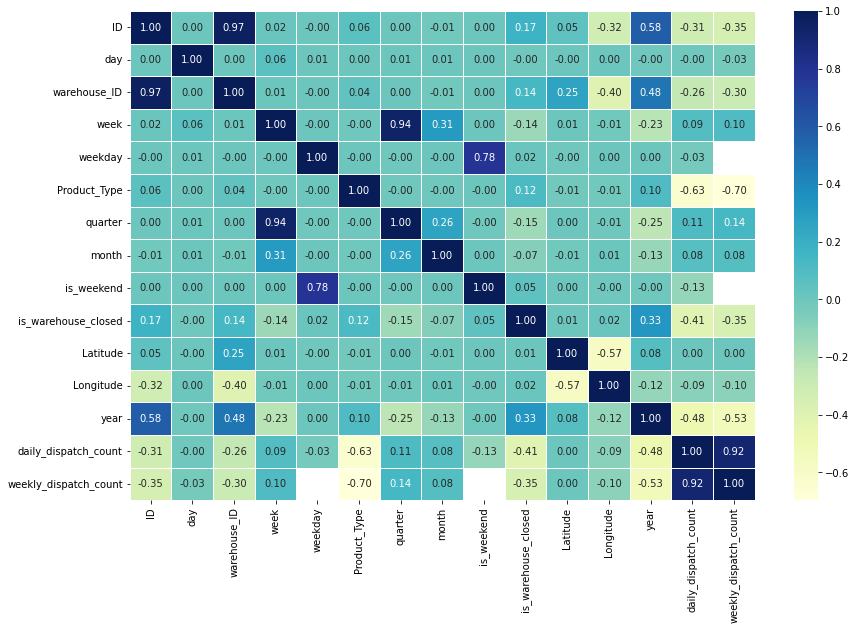

In [76]:
plt.figure(figsize=(14, 9))
sns.heatmap(data=df_temp.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.savefig('correlation matrix.png')
plt.show()

### Split data into features and target columns

Split columns into features(`x`) and target(`y`) columns...

In this dataframe first predict `daily_dispatch_count` and then after `weekly_dispatch_count`,  as well as we drop `ID` column from features column because of this is only unique identification of reported data...

In [52]:
x = df_temp.drop(columns=['ID', 'daily_dispatch_count', 'weekly_dispatch_count', ])
y = df_temp['daily_dispatch_count']

x.shape, y.shape

((16644, 12), (16644,))

Now, split all data into two part Training data and Testing data by using train_test_split.

Split training set and testing set by 90:10 ratio...

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14979, 12), (1665, 12), (14979,), (1665,))

> On this data-frame we run Regression model, because our target column is continuous dependent variable from a number of independent(feature) variables. 

There are three model running 
1. `LinearRegressor`
2. `RandomForestRegressor`
3. `GradientBoostingRegerssor`

And check its score(accuracy) value...

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def model_run(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    
    models_reg = {'LinearRegression' : LinearRegression(),
                  'RandomForestRegressor' : RandomForestRegressor(),
                  'GradientBoostingRegressor' : GradientBoostingRegressor()}
    score = {}
    
    for model_name, model in models_reg.items():
        # Fit the model
        model.fit(x_train, y_train)
        # Check score
        score[model_name] = model.score(x_test, y_test)
    
    return score

In [55]:
score = model_run()

In [56]:
score

{'LinearRegression': 0.6926662622091592,
 'RandomForestRegressor': 0.8476727881918164,
 'GradientBoostingRegressor': 0.8492725588865788}

As per result `GradientBoostingRegressor`'s performance it is much better then other model.

So, we run `GradientBoostingRegressor` model separately...

In [57]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(x_train, y_train)
model_gbr.score(x_test, y_test)

0.8492725588865788

Hyper tunning model by using `RandomizedSearchCV`...

In [58]:
from sklearn.model_selection import RandomizedSearchCV

search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

rsv_gbr = RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                             param_distributions=search_grid,
                             scoring='neg_mean_squared_error',
                             n_jobs=1,
                             cv=2)
rsv_gbr.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4],
                                        'n_estimators': [500, 1000, 2000],
                                        'random_state': [1],
                                        'subsample': [0.5, 0.75, 1]},
                   scoring='neg_mean_squared_error')

Check Best parameters of this model

In [59]:
rsv_gbr.best_params_

{'subsample': 0.75,
 'random_state': 1,
 'n_estimators': 2000,
 'max_depth': 4,
 'learning_rate': 0.01}

Now, set this parameters of this model check their performance...

In [60]:
model_gbr = GradientBoostingRegressor(subsample = 0.75,
                                      random_state = 1,
                                      n_estimators = 500, 
                                      max_depth = 4,
                                      learning_rate = 0.1)
model_gbr.fit(x_train, y_train)
model_gbr.score(x_test, y_test)

0.8599390538842221

In [61]:
model_gbr_1 = GradientBoostingRegressor(subsample = 1,
                                      random_state = 1,
                                      n_estimators = 500, 
                                      max_depth = 4,
                                      learning_rate = 0.1)
model_gbr_1.fit(x_train, y_train)
model_gbr_1.score(x_test, y_test)

0.8615428956465788

In [62]:
model_gbr_1 = GradientBoostingRegressor(subsample = .5,
                                      random_state = 1,
                                      n_estimators = 2000, 
                                      max_depth = 4,
                                      learning_rate = 0.01)
model_gbr_1.fit(x_train, y_train)
model_gbr_1.score(x_test, y_test)

0.862251152177329

> Now, model is ready to predict for test dataset..

Therefore,  make test data according feature value by filling all nun value, also convert all data into numeric formate and last make sure all data same as test input data...

In [63]:
# filling missing value in test data

# convert date format object to datetime format 
df_test['date'] = pd.DatetimeIndex(df_test['date'])

# filling nan value by using warehouse_id and latitude, longitude dictionary...
for i in range(len(df_test)):
    if str(df_test['Latitude'][i]) == 'nan':
        df_test.loc[i,'Latitude'] = latitude_warehouse_ID[df_test['warehouse_ID'][i]]
    if str(df_test['Longitude'][i]) == 'nan':
        df_test.loc[i,'Longitude'] = longitude_warehouse_ID[df_test['warehouse_ID'][i]]

# fill null value using weekday
is_weekend_dict = {'Sunday': 'Yes', 'Monday': 'No', 'Tuesday':'No', 'Wednesday':'No', 'Thursday':'No', 'Friday':'No',
                   'Saturday':'No'}
for i in range(len(df_test)):
    if str(df_test['is_weekend'][i]) == 'nan':
        df_test.loc[i,'is_weekend'] = is_weekend_dict[df_test['date'].dt.day_name()[i]]

# fill null value by randomly but using same ratio of data is already present
# In test data we fill this null value by using target column but in this data we don't have 
# that's why we use randomly data filled by existing ratio...
df_test['is_warehouse_closed'].fillna(pd.Series(
    np.random.choice(['Yes', 'No'],
                     p=[df_test['is_warehouse_closed'].value_counts(normalize=True)['Yes'],
                        df_test['is_warehouse_closed'].value_counts(normalize=True)['No']], 
                     size=len(df_test))), inplace=True)

In [64]:
# Now, convert all data into numeric format...
test_labeled, test_temp = convert_all_data_in_numeric(df_test)
# Drop ID column from test data 
test_temp.drop(columns='ID', inplace=True)
test_temp

,day,warehouse_ID,week,weekday,Product_Type,quarter,month,is_weekend,is_warehouse_closed,Latitude,Longitude,year
0,1,0,17,5,0,2,4,0,0,41.681471,-72.794746,2021
1,1,0,17,5,1,2,4,1,0,41.681471,-72.794746,2021
2,1,1,17,5,0,2,4,1,0,38.749077,-105.183060,2021
3,1,1,17,5,1,2,4,1,0,38.749077,-105.183060,2021
4,1,2,17,5,0,2,4,1,1,35.678970,-109.067413,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
4895,31,7,52,4,1,4,1,0,1,37.915825,-89.829262,2021
4896,31,8,52,4,0,4,1,0,0,48.692551,-116.319862,2021
4897,31,8,52,4,1,4,1,0,1,48.692551,-116.319862,2021
4898,31,9,52,4,0,4,1,0,0,61.600803,-149.125259,2021


In [65]:
# predict all data

y_pred = model_gbr_1.predict(test_temp)
y_pred

array([4.62848292, 2.32553113, 6.50016991, ..., 0.10196797, 5.92445952,
       0.49934326])

Now load all data into `df_test` as `daily_dispatch_count` and there are some negative value is present in this prediction, therefore convert into positive value by using _absolute_ function... 

In [66]:
df_test['week'] = df_test['date'].dt.isocalendar().week
df_test['daily_dispatch_count'] = y_pred
df_test['daily_dispatch_count'] = df_test['daily_dispatch_count'].abs()

Now, to calculate `weekly_dispatch_count` we have to unique identification of Each `week`, according their `warehouse_ID` also according to `Product_Type` and lastly their `Year`.

Therefore, make new column `Product_Type_warehouse_ID_week_year`.

In [67]:
df_test['Product_Type_warehouse_ID_week_year'] = df_test['Product_Type'] + '_' + df_test['warehouse_ID'] + '_' + df_test['week'].astype(str) + '-' + df_test['year'].astype(str)

Now, create new dataset and get all sum value of `daily_dispatch_count` by their `Product_Type_warehouse_ID_week_year`

In [68]:
x = df_test.groupby(['Product_Type_warehouse_ID_week_year'])['daily_dispatch_count'].sum().reset_index()

Now, Create null value column in df_test..

In [69]:
df_test['weekly_dispatch_count'] = np.nan

Save all data from x_ dictionary and save all sum value of `daily_dispatch_count` and create key value as `Product_Type_warehouse_ID_week_year`.

In [70]:
x_ = {}
for i in range(len(x)):
    x_[x['Product_Type_warehouse_ID_week_year'][i]] = x['daily_dispatch_count'][i]

Now save all data into `weekly_dispatch_count` column from `x_` dictionary...

In [71]:
for i in range(len(df_test)):
    df_test.loc[i,'weekly_dispatch_count'] = x_[df_test['Product_Type_warehouse_ID_week_year'][i]]

Now load `submission_weekly.csv` for submit...

In [72]:
df_sub = pd.read_csv('dataset/submission_weekly.csv')

Now, save all `weekly_dispatch_count` when Customer's ID match in both dataframe.

In [73]:
for i in range(len(df_sub)):
    
    df_sub.loc[i,'weekly_dispatch_count'] = float(df_test[df_test['ID'] == str(df_sub['ID'][i])]['weekly_dispatch_count'].values)

In [74]:
df_sub

,ID,weekly_dispatch_count
0,0x31fe,9.172774
1,0x31ff,4.440677
2,0x3ed4,13.430323
3,0x3ed5,5.596243
4,0x4a3c,8.151876
...,...,...
695,0x7133,13.113366
696,0x76a8,25.339209
697,0x76a9,4.262946
698,0x7b2c,27.246774


Now, save final output this file as a `.csv`.

In [75]:
df_sub.to_csv('submission_weekly.csv', index=False)